# Assessing Jobs Report shared by the WhiteHouse

<img src="Images/whitehouse_jobs.png" alt="Drawing" style="width: 400px;"/>

[source for image](https://www.instagram.com/p/CYceJIfr1rZ/) <br>
[source for data](https://data.bls.gov/timeseries/CES0000000001?output_view=net_1mth)

### Loading and Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from datetime import datetime

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
data = pd.read_csv('Data/jobs_report.csv')
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1981,90,72,105,73,13,194,111,-36,-88,-97,-209,-276
1,1982,-330,-2,-129,-284,-43,-242,-344,-158,-180,-276,-121,-15
2,1983,219,-73,173,274,280,377,416,-308,1118,273,355,355
3,1984,443,484,272,363,306,381,310,243,312,285,353,125
4,1985,265,131,339,196,274,147,189,192,205,188,210,166


The best way to reshape that data is with [`pd.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) <br>
(alternatively, `pd.wide_to_long` could work, but melt is more robsut)

In [4]:
cols = data.columns.tolist()
data = pd.melt(data, id_vars='Year', value_vars=cols[1:])

data.columns = pd.Index(['year', 'month', 'jobs_created'])
data['date'] = pd.to_datetime(data['year'].astype(str)  + data['month'], format='%Y%b')
data.head()

,year,month,jobs_created,date
0,1981,Jan,90,1981-01-01
1,1982,Jan,-330,1982-01-01
2,1983,Jan,219,1983-01-01
3,1984,Jan,443,1984-01-01
4,1985,Jan,265,1985-01-01


A sense of what the data looks like overtime, it's pretty clear to see the effects of covid

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

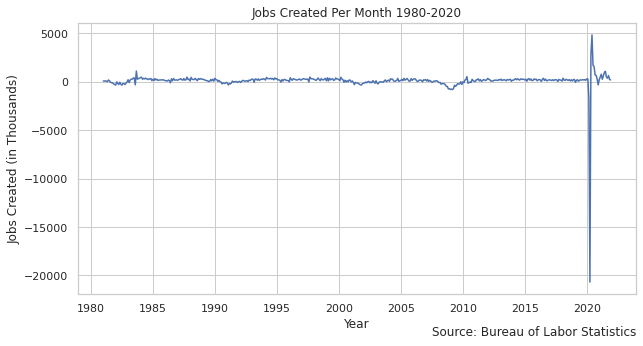

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='date', y='jobs_created', data=data)

ax.set_title('Jobs Created Per Month 1980-2020')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('Year')
plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})

### Average Jobs Created Per Month

In [6]:
make_date = lambda year: datetime.fromisoformat(f'{year}-01-20')
pres_years = {
    'Reagan': [make_date('1981'), make_date('1989')],
    'H.W. Bush': [make_date('1989'), make_date('1993')],
    'Clinton': [make_date('1993'), make_date('2001')],
    'W. Bush': [make_date('2001'), make_date('2009')],
    'Obama': [make_date('2009'), make_date('2017')],
    'Trump': [make_date('2017'), make_date('2021')],
    'Biden': [make_date('2021'), datetime.today()]
}

def year2pres(date):
    for pres, years in pres_years.items():
        if date in pd.date_range(*years):
            return pres
    return np.nan

In [7]:
data['president'] = data.date.apply(year2pres)
avg_president = data.groupby('president').agg({'jobs_created': np.mean}).reset_index()

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

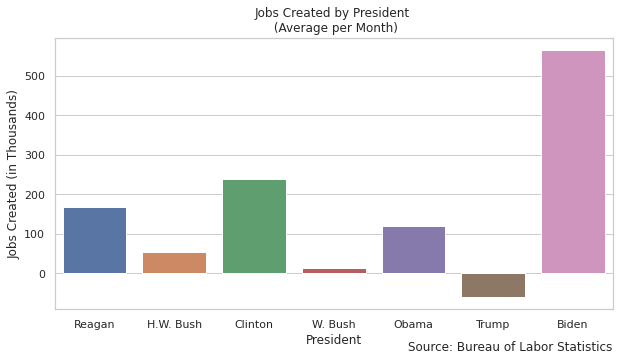

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
barplot_kwargs = {
    'x':'president',
    'y':'jobs_created',
    'data':avg_president, 
    'order':pres_years.keys()
}
ax = sns.barplot(**barplot_kwargs)

ax.set_title('Jobs Created by President \n (Average per Month)')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('President')
plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})

### Total Jobs Created by President

In [9]:
data['president'] = data.date.apply(year2pres)
total_president = (
    data
    .groupby('president')
    .agg({'jobs_created': np.sum})
    .reset_index()
    .sort_values('jobs_created')
)

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

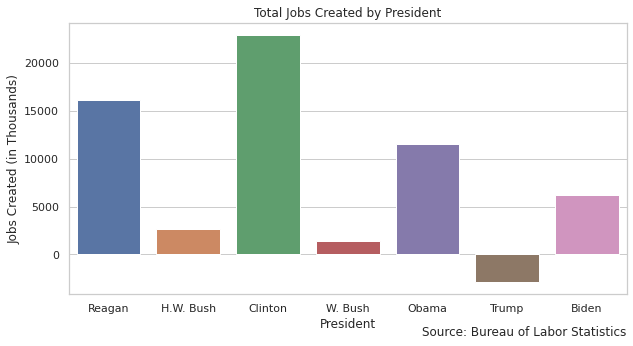

In [10]:
barplot_kwargs['data'] = total_president

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(**barplot_kwargs)
ax.set_title('Total Jobs Created by President')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('President')
plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})

### Average Per Month (outliers removed)

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

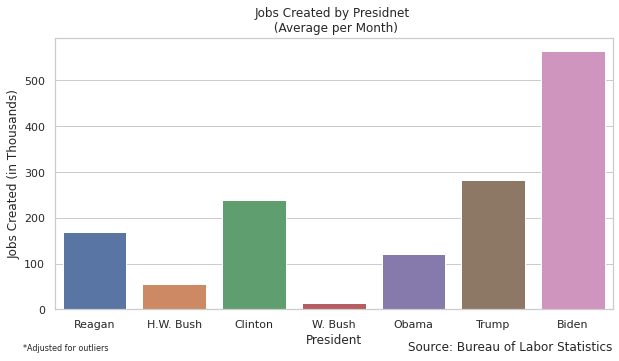

In [11]:
no_outlier = data[(np.abs(stats.zscore(data.jobs_created)) < 3)]
avg_no_outlier = (
    no_outlier
    .groupby('president')
    .agg({'jobs_created': np.mean})
    .reset_index()
    .sort_values('jobs_created')
)
barplot_kwargs['data'] = avg_no_outlier

fig, ax = plt.subplots(figsize=(10,5))


sns.barplot(**barplot_kwargs)
ax.set_title('Jobs Created by Presidnet \n (Average per Month)')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('President')

plt.figtext(0.2, 0.01, "*Adjusted for outliers", ha="right", fontsize=8, bbox={"facecolor":"none", "alpha":0.5, "pad":5})
plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})

This is the absolute case for all jobs created

### Total Jobs Created (No Outliers)

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

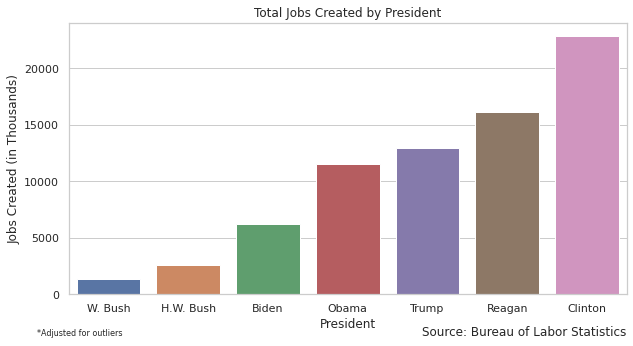

In [12]:
total_no_outlier = (
    no_outlier
    .groupby('president')
    .agg({'jobs_created': np.sum})
    .reset_index()
    .sort_values('jobs_created')
)
barplot_kwargs['data'] = total_no_outlier
barplot_kwargs['order'] = total_no_outlier['president']

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(**barplot_kwargs)
ax.set_title('Total Jobs Created by President')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('President')

plt.figtext(0.2, 0.01, "*Adjusted for outliers", ha="right", fontsize=8, bbox={"facecolor":"none", "alpha":0.5, "pad":5})
plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})

### Total Jobs Created in First Year

In [13]:
make_date = lambda year: datetime.fromisoformat(f'{year}-01-20')
make_end_date = lambda year: datetime.fromisoformat(f'{year}-12-20')
pres_years = {
    'Reagan': [make_date('1981'), make_end_date('1981')],
    'H.W. Bush': [make_date('1989'), make_end_date('1989')],
    'Clinton': [make_date('1993'), make_end_date('1993')],
    'W. Bush': [make_date('2001'), make_end_date('2001')],
    'Obama': [make_date('2009'), make_end_date('2013')],
    'Trump': [make_date('2017'), make_end_date('2017')],
    'Biden': [make_date('2021'), datetime.today()]
}

In [14]:
first_year = data.copy()
first_year['president'] = data.date.apply(year2pres)
first_year = first_year[~first_year.president.isna()]

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

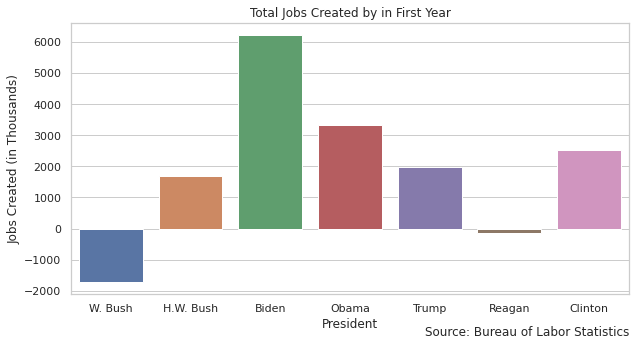

In [15]:
first_year_total = (
    first_year
    .groupby('president')
    .agg({'jobs_created': np.sum})
    .reset_index()
    .sort_values('jobs_created')
)

barplot_kwargs['data'] = first_year_total

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(**barplot_kwargs)

ax.set_title('Total Jobs Created by in First Year')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('President')

plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})

### First Term Jobs without Outliers

In [16]:
pres_years = {
    'Reagan': [make_date('1981'), make_date('1985')],
    'H.W. Bush': [make_date('1989'), make_date('1993')],
    'Clinton': [make_date('1993'), make_date('1997')],
    'W. Bush': [make_date('2001'), make_date('2005')],
    'Obama': [make_date('2009'), make_date('2013')],
    'Trump': [make_date('2017'), make_date('2021')],
    'Biden': [make_date('2021'), datetime.today()]
}

In [17]:
first_term = data.copy()
first_term['president'] = data.date.apply(year2pres)
first_term = first_term[~first_term.president.isna()]
first_term = first_term[(np.abs(stats.zscore(first_term.jobs_created)) < 3)]

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

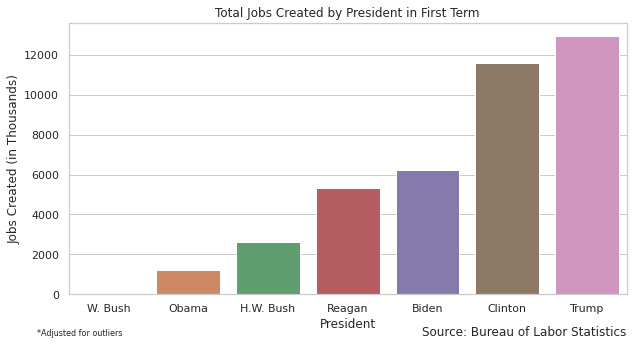

In [18]:
first_term_total = (
    first_term
    .groupby('president')
    .agg({'jobs_created': np.sum})
    .reset_index()
    .sort_values('jobs_created')
)

barplot_kwargs['data'] = first_term_total
barplot_kwargs['order'] = first_term_total.president

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(**barplot_kwargs)
ax.set_title('Total Jobs Created by President in First Term')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('President')

plt.figtext(0.2, 0.01, "*Adjusted for outliers", ha="right", fontsize=8, bbox={"facecolor":"none", "alpha":0.5, "pad":5})
plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})

### Non Negative Job Creation

In [19]:
non_negative = data.copy()
non_negative = non_negative[non_negative.jobs_created >= 0]

Text(0.9, 0.01, 'Source: Bureau of Labor Statistics')

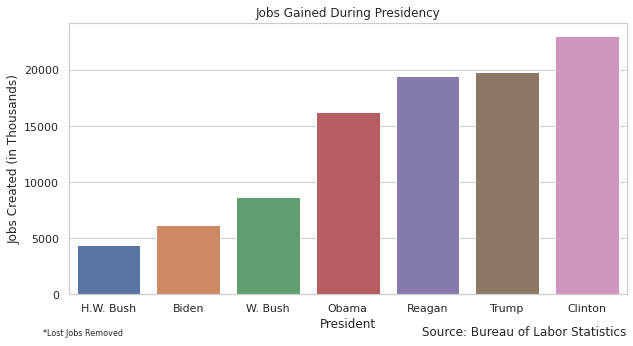

In [20]:
non_negative_total = (
    non_negative
    .groupby('president')
    .agg({'jobs_created': np.sum})
    .reset_index()
    .sort_values('jobs_created')
)

barplot_kwargs['data'] = non_negative_total
barplot_kwargs['order'] = non_negative_total.president

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(**barplot_kwargs)
ax.set_title('Jobs Gained During Presidency')
ax.set_ylabel('Jobs Created (in Thousands)')
ax.set_xlabel('President')

plt.figtext(0.2, 0.01, "*Lost Jobs Removed", ha="right", fontsize=8, bbox={"facecolor":"none", "alpha":0.5, "pad":5})
plt.figtext(0.9, 0.01, "Source: Bureau of Labor Statistics", ha="right", fontsize=12, bbox={"facecolor":"none", "alpha":1, "pad":5})